In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
from astropy.stats import bootstrap

## Load data

In [3]:
zeropoint = np.load('Run_040118/bolp_21p0_0.npz')
pert1 = np.load('Run_040118/bolp_21p0_um_0.npz')
pert2 = np.load('Run_040118/bolp_21p0_um_0_1.npz')

In [4]:
p_0 = zeropoint['param'][0]
print p_0

[  1.33738  13.98811   0.5595   11.95797  12.82356   0.        0.     ]


In [5]:
func_0 = np.mean(zeropoint['func_all'],axis=0)

In [6]:
d_pert_func = np.concatenate((pert1['func_all'][:5000],pert2['func_all'][:15000],\
                            pert1['func_all'][5000:10000],pert2['func_all'][15000:30000],\
                            pert1['func_all'][10000:15000],pert2['func_all'][30000:45000],\
                            pert1['func_all'][15000:20000],pert2['func_all'][45000:60000],\
                            pert1['func_all'][20000:25000],pert2['func_all'][60000:75000],\
                            pert1['func_all'][25000:30000],pert2['func_all'][75000:90000],\
                            pert1['func_all'][30000:35000],pert2['func_all'][90000:105000],\
                            pert1['func_all'][35000:40000],pert2['func_all'][105000:120000],\
                            pert1['func_all'][40000:45000],pert2['func_all'][120000:135000],\
                            pert1['func_all'][45000:50000],pert2['func_all'][135000:150000],\
                            pert1['func_all'][50000:55000],pert2['func_all'][150000:165000],\
                            pert1['func_all'][55000:60000],pert2['func_all'][165000:180000],\
                            pert1['func_all'][60000:65000],pert2['func_all'][180000:195000],
                            pert1['func_all'][65000:],pert2['func_all'][195000:]))-func_0

In [51]:
N_pert = 40000
hN_pert = N_pert/2
N_real = 1000
len_obs = 120

In [8]:
d_p_pert = np.concatenate((pert1['param'][:5000],pert2['param'][:15000],\
                            pert1['param'][5000:10000],pert2['param'][15000:30000],\
                            pert1['param'][10000:15000],pert2['param'][30000:45000],\
                            pert1['param'][15000:20000],pert2['param'][45000:60000],\
                            pert1['param'][20000:25000],pert2['param'][60000:75000],\
                            pert1['param'][25000:30000],pert2['param'][75000:90000],\
                            pert1['param'][30000:35000],pert2['param'][90000:105000],\
                            pert1['param'][35000:40000],pert2['param'][105000:120000],\
                            pert1['param'][40000:45000],pert2['param'][120000:135000],\
                            pert1['param'][45000:50000],pert2['param'][135000:150000],\
                            pert1['param'][50000:55000],pert2['param'][150000:165000],\
                            pert1['param'][55000:60000],pert2['param'][165000:180000],\
                            pert1['param'][60000:65000],pert2['param'][180000:195000],
                            pert1['param'][65000:],pert2['param'][195000:]))-p_0

In [9]:
d_p_pert[::20000]

array([[-0.025,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.025,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   , -0.05 ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.05 ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   , -0.02 ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.02 ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , -0.1  ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.1  ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   , -0.02 ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.02 ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   , -0.05 ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.05 ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   , -0.05 ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.05 ]])

## Bootstrap for df/dp

In [12]:
def bootstrap_mean(sample,nboot=1):
    return bootstrap(sample, nboot, bootfunc=np.mean)

In [73]:
bootstrap_means = bootstrap_mean(d_pert_func[:20000,0],10000)

2.0602112e-06 2.06039391936e-06 4.5420681336e-08


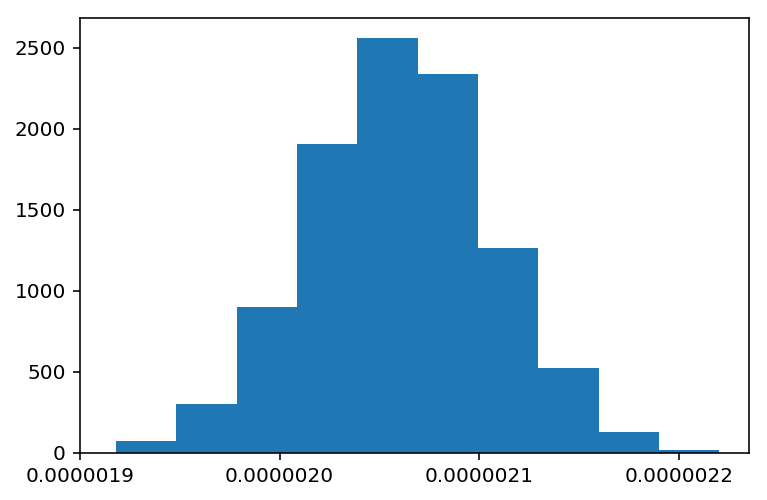

In [80]:
plt.hist(bootstrap_means)
plt.xticks((0.0000019,0.000002,0.0000021,0.0000022))
print np.mean(d_pert_func[:20000,0]),np.mean(bootstrap_means),np.std(bootstrap_means)

In [82]:
subsample_10000 = d_pert_func[np.random.randint(20000,size=10000),0]
bootstrap_means_10000 = bootstrap_mean(subsample_10000,10000)

2.0601216e-06 2.06050628352e-06 6.43992330954e-08


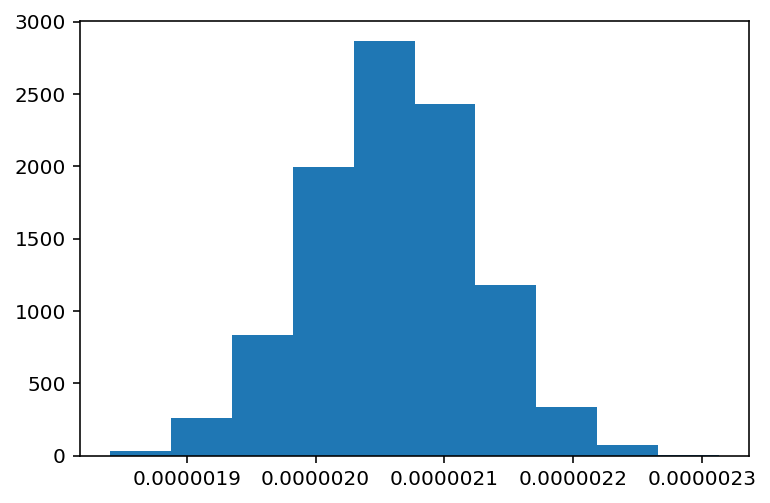

In [83]:
plt.hist(bootstrap_means_10000)
print np.mean(subsample_10000),np.mean(bootstrap_means_10000),np.std(bootstrap_means_10000)

In [84]:
subsample_5000 = d_pert_func[np.random.randint(20000,size=5000),0]
bootstrap_means_5000 = bootstrap_mean(subsample_5000,10000)

1.9990912e-06 1.99926837888e-06 9.01496239428e-08


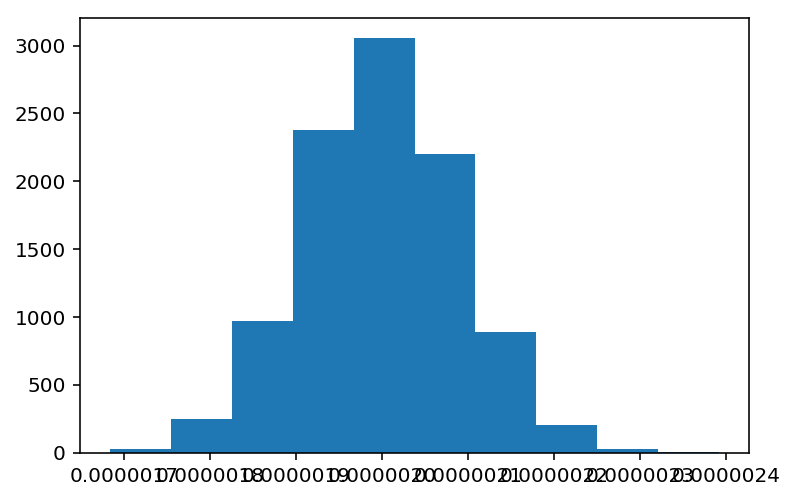

In [85]:
plt.hist(bootstrap_means_5000)
print np.mean(subsample_5000),np.mean(bootstrap_means_5000),np.std(bootstrap_means_5000)

In [141]:
mean_bootstrap_means = []
std_bootstrap_means = []
mean_subsample = []
for i in range(100):
    subsample_i = d_pert_func[np.random.randint(20000,size=i*200+200),0]
    bootstrap_means_i = bootstrap_mean(subsample_i,10000)
    mean_bootstrap_means.append(np.mean(bootstrap_means_i))
    std_bootstrap_means.append(np.std(bootstrap_means_i))
    mean_subsample.append(np.mean(subsample_i))
    print i

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


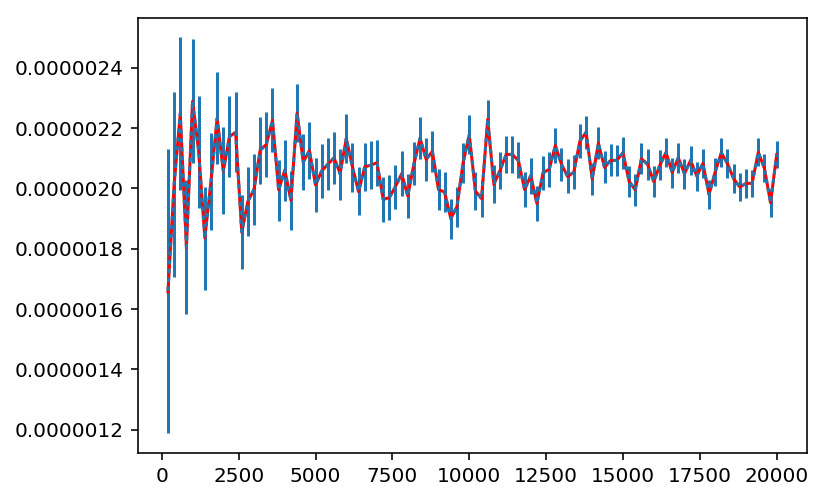

In [153]:
plt.errorbar(np.arange(1,101)*200,mean_bootstrap_means,std_bootstrap_means,linestyle=':')
plt.plot(np.arange(1,101)*200,mean_subsample,'r-')

In [52]:
dfdp = np.zeros((7,len_obs))

In [63]:
def absmin(array):
    absarray = np.abs(array)
    arg = np.argmin(absarray)
    return array[arg]

Instead of using mean of (df+)/(dp+) and (df-)/(dp-), use the smaller value?

In [66]:
for i in range(7):
    for j in range(len_obs):
        print i,j
        dfdp[i,j] = absmin(np.concatenate((bootstrap_mean(d_pert_func[i*N_pert:i*N_pert+hN_pert,j],100),\
                                       -bootstrap_mean(d_pert_func[i*N_pert+hN_pert:i*N_pert+N_pert,j],100))))\
                                       /d_p_pert[i*N_pert,i]

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
0 53
0 54
0 55
0 56
0 57
0 58
0 59
0 60
0 61
0 62
0 63
0 64
0 65
0 66
0 67
0 68
0 69
0 70
0 71
0 72
0 73
0 74
0 75
0 76
0 77
0 78
0 79
0 80
0 81
0 82
0 83
0 84
0 85
0 86
0 87
0 88
0 89
0 90
0 91
0 92
0 93
0 94
0 95
0 96
0 97
0 98
0 99
0 100
0 101
0 102
0 103
0 104
0 105
0 106
0 107
0 108
0 109
0 110
0 111
0 112
0 113
0 114
0 115
0 116
0 117
0 118
0 119
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25
1 26
1 27
1 28
1 29
1 30
1 31
1 32
1 33
1 34
1 35
1 36
1 37
1 38
1 39
1 40
1 41
1 42
1 43
1 44
1 45
1 46
1 47
1 48
1 49
1 50
1 51
1 52
1 53
1 54
1 55
1 56
1 57
1 58
1 59
1 60
1 61
1 62
1 63
1 64
1 65
1 66
1 67
1 68
1 69
1 70
1 71
1 72
1 73
1 74
1 75
1 76
1 77
1 78
1 79


In [59]:
def calc_cov(covjk,func_real):
    return np.mean(covjk,axis=0)+np.cov(func_real.T)

In [60]:
def calc_fisher(dfdp, covtot):
    fmatrix = np.zeros((7,7))
    for i in range(7):
        for j in range(7):
            fmatrix[i,j] = np.dot(dfdp[i],np.dot(np.linalg.inv(covtot),dfdp[j]))
    return fmatrix

In [61]:
def calc_1sigma(fisher):
    return np.sqrt(np.linalg.inv(fisher).diagonal())

In [69]:
calc_1sigma(calc_fisher(dfdp,calc_cov(zeropoint['func_all_cov'][:,:len_obs,:len_obs],zeropoint['func_all'][:,:len_obs])))

array([ 0.05717491,  0.01695421,  0.03475023,  0.1341977 ,  0.02298365,
        0.2158275 ,  0.28054175])

(array([  1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          2.00000000e+00,   9.00000000e+00,   1.00000000e+01,
          1.40000000e+01,   1.90000000e+01,   3.00000000e+01,
          5.90000000e+01,   8.30000000e+01,   1.22000000e+02,
          1.57000000e+02,   2.22000000e+02,   2.74000000e+02,
          3.64000000e+02,   4.22000000e+02,   5.37000000e+02,
          6.56000000e+02,   7.02000000e+02,   7.61000000e+02,
          9.59000000e+02,   1.04000000e+03,   1.09700000e+03,
          1.10200000e+03,   1.17500000e+03,   1.15400000e+03,
          1.15300000e+03,   1.12100000e+03,   9.35000000e+02,
          9.56000000e+02,   9.23000000e+02,   7.96000000e+02,
          6.48000000e+02,   5.57000000e+02,   4.25000000e+02,
          3.85000000e+02,   2.68000000e+02,   2.42000000e+02,
          1.94000000e+02,   1.49000000e+02,   7.20000000e+01,
          6.80000000e+01,   4.50000000e+01,   3.20000000e+01,
          2.70000000e+01,   1.00000000e+01,   9.00000000e+00,
        

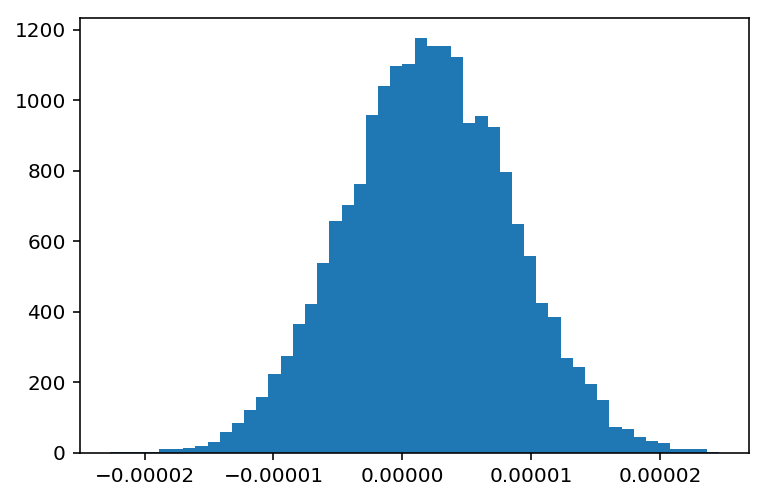

In [70]:
plt.hist(d_pert_func[0:20000,0],50)

In [71]:
from scipy.stats import normaltest

In [72]:
normaltest(d_pert_func[0:20000,0])

NormaltestResult(statistic=8.7209389663771653, pvalue=0.012772389819407487)